In [3]:
import pandas as pd
import numpy as np

In [4]:
bed = "beds/locations-8-0.90-tae.bed.gz"

In [5]:
df = pd.read_csv(bed, sep="\t", header=None, names=[
    "chr", "start", "end", "motif", "score"
])
df

,chr,start,end,motif,score
0,chr1A,65400,65408,NGCTGCTG,1.000000
1,chr1A,65401,65409,GCTGCWGS,1.000000
2,chr1A,65446,65454,TGCADGTG,1.000000
3,chr1A,65467,65475,RTGCATGS,1.000000
4,chr1A,65474,65482,GGCGGMGG,1.000000
...,...,...,...,...,...
12680228,chrUn,478934399,478934407,GCAGCARS,0.919954
12680229,chrUn,478935090,478935098,TGCAASCA,0.855321
12680230,chrUn,478935556,478935564,TTGCWTGC,1.000000
12680231,chrUn,478935557,478935565,TGCTTGCW,1.000000


In [6]:
(df["chr"]).unique()

array(['chr1A', 'chr1B', 'chr1D', 'chr2A', 'chr2B', 'chr2D', 'chr3A',
       'chr3B', 'chr3D', 'chr4A', 'chr4B', 'chr4D', 'chr5A', 'chr5B',
       'chr5D', 'chr6A', 'chr6B', 'chr6D', 'chr7A', 'chr7B', 'chr7D',
       'chrUn'], dtype=object)

In [7]:
df.motif.value_counts()

GCKGCKGC    74790
GCMGCMGC    74011
CGCCGCCD    63368
HGGCGGCG    63210
CGGCGGHG    55264
            ...  
TGCATGCA        1
CATGTGCA        1
CTGCATGY        1
CATSTGCA        1
WTGCAGCA        1
Name: motif, Length: 918, dtype: int64

In [8]:
def get_unique_motifs(df):
    if "score" not in df:
        df["score"] = np.nan
    df_motifs = df.groupby("motif")[["motif", "score"]].agg(
    {
        'motif': 'size',
        'score': 'mean',
    }
    ).rename(columns={'motif': 'count'}).sort_values('count', ascending=False).reset_index()
    return df_motifs

In [9]:
df_motifs = get_unique_motifs(df)
df_motifs

,motif,count,score
0,GCKGCKGC,74790,0.955177
1,GCMGCMGC,74011,0.954046
2,CGCCGCCD,63368,0.897639
3,HGGCGGCG,63210,0.898818
4,CGGCGGHG,55264,0.896195
...,...,...,...
913,CTGCATGY,1,0.973682
914,CATSTGCA,1,1.000000
915,CATGTGCA,1,0.549110
916,TGCTGCAG,1,0.583806


<AxesSubplot:>

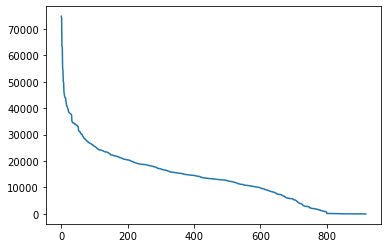

In [10]:
df_motifs["count"].plot()

## Mergeable motifs 

In [11]:
diff_prev = df["start"].diff(1)
offset_1 = diff_prev == 1
offset_1.mean()

0.47900223915443824

In [12]:
def get_offset_percentage(n):
    return (diff_prev == n).mean()

def get_offset_counts(n):
    return (diff_prev == n).sum()

<AxesSubplot:>

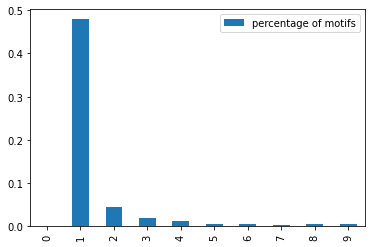

In [13]:
pd.DataFrame([
    get_offset_percentage(i) for i in range(10)
], columns=["percentage of motifs"], index=range(10)).plot.bar()

<AxesSubplot:>

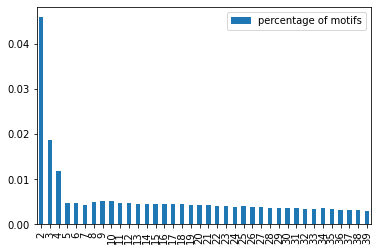

In [14]:
pd.DataFrame([
    get_offset_percentage(i) for i in range(2, 40)
], columns=["percentage of motifs"], index=range(2,40)).plot.bar()

<AxesSubplot:>

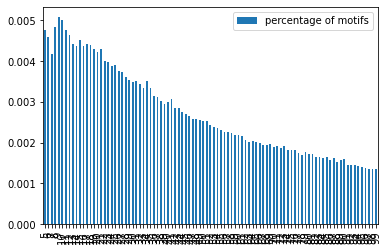

In [15]:
pd.DataFrame([
    get_offset_percentage(i) for i in range(5, 100)
], columns=["percentage of motifs"], index=range(5,100)).plot.bar()

In [16]:
[get_offset_percentage(i) for i in range(20)]

[0.0,
 0.47900223915443824,
 0.04592541793198911,
 0.01868270086204252,
 0.01174442141560017,
 0.004762057605723806,
 0.00459068851495079,
 0.0041808380019515414,
 0.0048458888728621944,
 0.005085553238651056,
 0.005019071810431244,
 0.004768051186441132,
 0.004630750870271864,
 0.00443241066627088,
 0.0043834368027779935,
 0.004529096586789848,
 0.00436995124616401,
 0.004420344641932053,
 0.004386670181849182,
 0.004297791688843573]

In [17]:
[get_offset_counts(i) for i in range(20)]

[0,
 6073860,
 582345,
 236901,
 148922,
 60384,
 58211,
 53014,
 61447,
 64486,
 63643,
 60460,
 58719,
 56204,
 55583,
 57430,
 55412,
 56051,
 55624,
 54497]

5 groups are discernable:
- A peak of 50% of the motifs at offset 1. These motifs are pieces of length 8 from a larger motif and should be mergable.
- Motifs at offset 2,3,4 concisting of 5-1% of the motifs (8% in total). Merging these would be more difficult. N can be used to mean any base, but variable length is difficult. '.' or '-'? 
- downward trend at 5,6,7 offset
- hill at 8,9,10 offset
- slow downward slope for increasing offset

In [18]:
df["offset_1"] = offset_1 | offset_1.shift(-1)
df

,chr,start,end,motif,score,offset_1
0,chr1A,65400,65408,NGCTGCTG,1.000000,True
1,chr1A,65401,65409,GCTGCWGS,1.000000,True
2,chr1A,65446,65454,TGCADGTG,1.000000,False
3,chr1A,65467,65475,RTGCATGS,1.000000,False
4,chr1A,65474,65482,GGCGGMGG,1.000000,True
...,...,...,...,...,...,...
12680228,chrUn,478934399,478934407,GCAGCARS,0.919954,True
12680229,chrUn,478935090,478935098,TGCAASCA,0.855321,False
12680230,chrUn,478935556,478935564,TTGCWTGC,1.000000,True
12680231,chrUn,478935557,478935565,TGCTTGCW,1.000000,True


## Merged motif lengths

In [19]:
df["subgroup"] = (df.start.diff() != 1).cumsum() - 1
df

,chr,start,end,motif,score,offset_1,subgroup
0,chr1A,65400,65408,NGCTGCTG,1.000000,True,0
1,chr1A,65401,65409,GCTGCWGS,1.000000,True,0
2,chr1A,65446,65454,TGCADGTG,1.000000,False,1
3,chr1A,65467,65475,RTGCATGS,1.000000,False,2
4,chr1A,65474,65482,GGCGGMGG,1.000000,True,3
...,...,...,...,...,...,...,...
12680228,chrUn,478934399,478934407,GCAGCARS,0.919954,True,6606369
12680229,chrUn,478935090,478935098,TGCAASCA,0.855321,False,6606370
12680230,chrUn,478935556,478935564,TTGCWTGC,1.000000,True,6606371
12680231,chrUn,478935557,478935565,TGCTTGCW,1.000000,True,6606371


In [20]:
df_mergable = df[df.offset_1].reset_index()
df_mergable

,index,chr,start,end,motif,score,offset_1,subgroup
0,0,chr1A,65400,65408,NGCTGCTG,1.000000,True,0
1,1,chr1A,65401,65409,GCTGCWGS,1.000000,True,0
2,4,chr1A,65474,65482,GGCGGMGG,1.000000,True,3
3,5,chr1A,65475,65483,GCGGHGGC,1.000000,True,3
4,6,chr1A,65682,65690,SGCGGCGG,1.000000,True,4
...,...,...,...,...,...,...,...,...
8774435,12680226,chrUn,478934397,478934405,SWGCAGCA,1.000000,True,6606369
8774436,12680227,chrUn,478934398,478934406,WGCAGCAR,1.000000,True,6606369
8774437,12680228,chrUn,478934399,478934407,GCAGCARS,0.919954,True,6606369
8774438,12680230,chrUn,478935556,478935564,TTGCWTGC,1.000000,True,6606371


In [21]:
subgroups = df.subgroup.value_counts()
subgroups

4230638    50
598772     44
5967605    40
2589421    40
5802935    39
           ..
1653728     1
5845985     1
1645540     1
6252159     1
3652741     1
Name: subgroup, Length: 6606373, dtype: int64

In [22]:
df[df.subgroup == df.subgroup.mode()[0]]

,chr,start,end,motif,score,offset_1,subgroup
8120277,chr5B,488120451,488120459,GHGGCGGC,0.855321,True,4230638
8120278,chr5B,488120452,488120460,HGGCGGCG,0.899421,True,4230638
8120279,chr5B,488120453,488120461,GGCGGCKG,1.000000,True,4230638
8120280,chr5B,488120454,488120462,GCGGCGGM,0.855321,True,4230638
8120281,chr5B,488120455,488120463,CGGCGGHG,0.899421,True,4230638
8120282,chr5B,488120456,488120464,GGCGGMGG,0.899421,True,4230638
8120283,chr5B,488120457,488120465,GCGGHGGC,0.855321,True,4230638
8120284,chr5B,488120458,488120466,CGGHGGCG,0.754742,True,4230638
8120285,chr5B,488120459,488120467,GGMGGCGG,0.899421,True,4230638
8120286,chr5B,488120460,488120468,GHGGCGGC,0.855321,True,4230638


<AxesSubplot:>

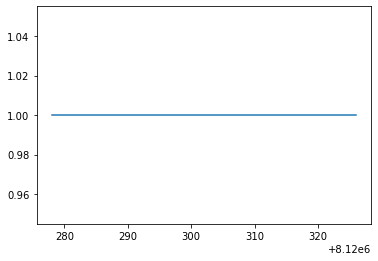

In [23]:
df[df.subgroup == df.subgroup.mode()[0]].start.diff().plot()

- The 50 length motif has no breaks, so the code is correct now

In [24]:
subgroup_length_counts = subgroups.value_counts()
subgroup_length_counts

1     3905793
2     1178234
3      712550
4      369642
5      201316
6      101178
7       58946
8       30300
9       18011
10      10396
11       6523
12       3909
13       2837
14       1875
15       1359
16       1027
17        702
18        476
19        387
20        260
21        174
22        139
23        107
25         64
24         56
26         36
27         20
28         14
29         11
30          8
31          4
36          4
32          3
34          3
35          3
40          2
39          1
44          1
33          1
50          1
Name: subgroup, dtype: int64

<AxesSubplot:>

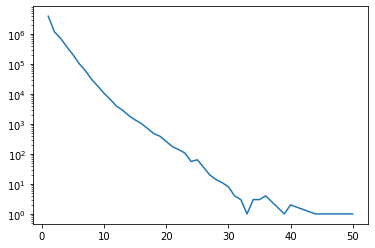

In [25]:
subgroup_length_counts.sort_index().plot(logy=True)

- The distribution of subgroup sizes falls of quickly until size 30, and then has a long small tail until 50
- The longest possible merged motif for offset 1 is of length 57 (8 + 49)

## Merge methods

In [27]:
d = Bio.Data.IUPACData.ambiguous_dna_values
list(product(*map(d.get, "ABN")))

NameError: name 'Bio' is not defined

In [28]:
from itertools import product
import Bio

def ambiguous_dna_list(seq):
    """return list of all possible sequences given an ambiguous DNA input"""
    d = Bio.Data.IUPACData.ambiguous_dna_values
    return list(map("".join, product(*map(d.get, seq))))


def is_degen_mergable(str1, str2):
    for s1, s2 in product(ambiguous_dna_list(str1), ambiguous_dna_list(str2)):
        if s1 == s2:
            return True
    return False

def degen_merge(motifs):
    consensus = list(Bio.motifs.create(motifs, alphabet="GATCRYWSMKHBVDN").consensus)
    return "".join(consensus)

def degen_merge_with_offset(motifs, offset=1):
    motifs = [
        "N"*i + m + "N"*(len(motifs)-i-1)
        for i, m in enumerate(motifs)
    ]    
    return motifs[0][0] + degen_merge(motifs)[1:-1] + motifs[-1][-1]

def get_merge_type(motifs : pd.Series, offset=1):
    """
    >>> get_merge_type(pd.Series(["AAA", "AAB", "ABA"]))
    perfect
    >>> get_merge_type(pd.Series(["AAA", "AAB", "MBA"]))
    degen
    >>> get_merge_type(pd.Series(["SWGCAGCA", "WGCAGCAR"]))
    perfect
    
    """
    motif = motifs.iloc[0]
    output = "perfect"
    for m in motifs.iloc[1:]:
        prev_substring = motif[-(len(m)-offset):]
        curr_substring = m[:-offset]
        if output == "perfect":
            if curr_substring != prev_substring:
                output = "degen"
        if output == "degen":
            if not is_degen_mergable(prev_substring, curr_substring):
                # unknown
                return "unknown"
        motif = m
    return output

def do_merge(motifs : pd.Series, offset=1):
    merge_type = get_merge_type(motifs)
    if merge_type == "perfect":
        return motifs.iloc[0] + motifs.iloc[1:].str[-1].str.cat()
    elif merge_type == "degen":
        return degen_merge_with_offset(motifs)
    else:
        return None

In [30]:
from Bio import motifs

In [31]:
degen_merge(pd.Series(["AAA", "ADA", "GAA"]))

'AAA'

In [90]:
l = 3
for i, m in enumerate(pd.Series(["AAA", "BBB", "CCC"])):
    print("N" * (i) + m + "N" * (l-i-1))

AAANN
NBBBN
NNCCC


In [91]:
pd.Series(["BA", "CA", "DA"]).str[-1].str.cat()

'AAA'

In [92]:
N = 100_000
df_mergable_with_type = df_mergable.head(N).copy().reset_index()
df_merge_type = df_mergable_with_type.head(N).groupby(by="subgroup").agg({
    'motif': get_merge_type
})
df_mergable_with_type = df_mergable_with_type.join(
    df_merge_type.rename(columns={"motif": "merge_type"}),
    on="subgroup",
    how="inner",
)
df_mergable_with_type

,level_0,index,chr,start,end,motif,score,offset_1,subgroup,merge_type
0,0,0,chr1A,65400,65408,NGCTGCTG,1.000000,True,0,degen
1,1,1,chr1A,65401,65409,GCTGCWGS,1.000000,True,0,degen
2,2,4,chr1A,65474,65482,GGCGGMGG,1.000000,True,3,degen
3,3,5,chr1A,65475,65483,GCGGHGGC,1.000000,True,3,degen
4,4,6,chr1A,65682,65690,SGCGGCGG,1.000000,True,4,perfect
...,...,...,...,...,...,...,...,...,...,...
99995,99995,144850,chr1A,171459566,171459574,CTGCADCA,0.943001,True,75629,degen
99996,99996,144851,chr1A,171459567,171459575,WGCAKCAG,0.879449,True,75629,degen
99997,99997,144852,chr1A,171459568,171459576,GCAKCAGY,0.706455,True,75629,degen
99998,99998,144854,chr1A,171459770,171459778,WSCATGCA,1.000000,True,75631,perfect


In [93]:
def get_counts_and_percentage(df):
    return pd.concat([
        df.value_counts(), 
        df.value_counts(normalize=True) * 100,
    ],axis=1, keys=('counts','percentage'))

In [94]:
get_counts_and_percentage(df_mergable_with_type["merge_type"])

,counts,percentage
degen,82100,82.1
perfect,17900,17.9


In [95]:
df_motifs

,motif,count,score
0,GCKGCKGC,74790,0.955177
1,GCMGCMGC,74011,0.954046
2,CGCCGCCD,63368,0.897639
3,HGGCGGCG,63210,0.898818
4,CGGCGGHG,55264,0.896195
...,...,...,...
913,CTGCATGY,1,0.973682
914,CATSTGCA,1,1.000000
915,CATGTGCA,1,0.549110
916,TGCTGCAG,1,0.583806


In [364]:
N = 100_000
df_merged = df_mergable.head(N).groupby("subgroup").agg({
    'motif': degen_merge_with_offset,
})
df_merged

,motif
subgroup,
0,NGCTGCTGS
3,GGCGGMGGC
4,SGCGGCGGM
9,KNNATGCATGTNNA
11,NGCAGCAGN
...,...
75622,TKGCATGCAKS
75625,ATGSATGCT
75628,SNWGCTGCTSM


In [311]:
df_merged_motifs = df_merged.groupby("motif").agg(
    {
        'motif': 'size',
    }
    ).rename(columns={'motif': 'count'}).sort_values('count', ascending=False).reset_index()
df_merged_motifs

,motif,count
0,TCATCATCA,128
1,TGATGATGA,125
2,SGGCGGCGS,72
3,MTGCAWGCW,69
4,KCAKCAGCW,67
...,...,...
9686,GTKCATGCAKS,1
9687,GTKCATGCACM,1
9688,GTKCATGCAC,1
9689,GTGCATGYAC,1


In [98]:
df_test1 = df_mergable_with_type.groupby("subgroup").agg({
    'motif': do_merge,
})
df_test2 = df_mergable_with_type.groupby("subgroup").agg({
    'motif': degen_merge_with_offset,
})
all(df_test1 == df_test2)

True

In [99]:
df_merged.motif.apply(len).value_counts()

9     13317
10     8252
11     4207
12     2281
13     1176
14      686
15      322
16      193
17      109
18       67
19       49
20       34
21       23
23       20
22       14
24       10
25        5
29        3
27        2
26        2
28        2
33        1
32        1
Name: motif, dtype: int64

<AxesSubplot:>

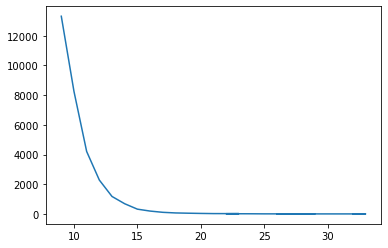

In [100]:
df_merged.motif.apply(len).value_counts().plot()

## Compare motifs

In [9]:
from Bio import motifs
from pathlib import Path

In [11]:
jaspar_motifs = []
for location in Path("jaspar").iterdir():
    with open(str(location)) as fh:
        for m in motifs.parse(fh, "jaspar"):
            jaspar_motifs.append(m)
len(jaspar_motifs)

530

In [103]:
df_jaspar = pd.DataFrame([str(m.degenerate_consensus.strip("N")) for m in jaspar_motifs], columns=["motif"])
df_jaspar["motif_length"] = df_jaspar["motif"].apply(len)
df_jaspar

,motif,motif_length
0,TNCCAWWWATAGNW,14
1,TTWCCWAAWNNGGNAA,16
2,YNCAATTATTGS,12
3,AAAGC,5
4,AAAGYV,6
...,...,...
525,YGGTCAAC,8
526,TGGTCAAC,8
527,GGTCAAC,7
528,RGTCAAC,7


<AxesSubplot:>

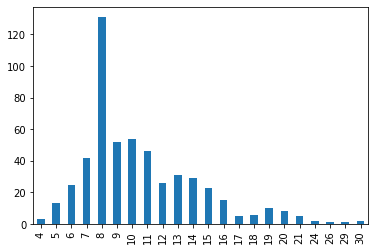

In [104]:
df_jaspar.motif_length.value_counts().sort_index().plot.bar()

In [105]:
df_jaspar_8 = df_jaspar[df_jaspar.motif_length == 8]

In [106]:
len(df_jaspar_8)

131

In [107]:
matched_motifs = df_motifs.motif.str.contains(df_jaspar.motif.str.cat(sep="|"), regex=True)
matched_motifs.mean()

0.05228758169934641

In [108]:
def motif_to_regex(m):
    output = []
    for c in m:
        poss = ambiguous_dna_list(c)
        if len(poss) == 1:
            output.append(poss[0])
        else:
            output.append(f"[{''.join(poss)}]")
    return "".join(output)

In [113]:
from Bio import Align

In [296]:
aligner = Align.PairwiseAligner()
aligner.substitution_matrix = Align.substitution_matrices.load("NUC.4.4")
aligner.mode = 'global'
aligner.target_left_extend_gap_score = -2.5
aligner.target_right_extend_gap_score = -2.5
aligner.query_left_extend_gap_score = -2.5
aligner.query_right_extend_gap_score = -2.5
aligner.target_left_open_gap_score = -2.5
aligner.target_right_open_gap_score = -2.5
aligner.query_left_open_gap_score = -2.5
aligner.query_right_open_gap_score = -2.5
aligner.query_internal_open_gap_score = -2.5
aligner.query_internal_extend_gap_score = -2.5
aligner.target_internal_open_gap_score = -2.5
aligner.target_internal_extend_gap_score = -2.5
aligner.open_gap_score = -2.5
aligner.extend_gap_score = -2.5

In [388]:
def score(seq, motif, max_score=5):
    return aligner.score(seq, motif) / (max_score * len(motif))

def get_best_motif(seq):
    jaspar_scores = df_jaspar.motif.apply(lambda m: score(seq, m))
#     adjusted_scores = jaspar_scores * df_jaspar.motif_length
    i = np.argmax(jaspar_scores)
    return pd.Series({
        "match_score": jaspar_scores[i],
        "jaspar_motif": df_jaspar.motif[i],
        "motif": seq,
    })

In [372]:
aligner.score("AAA", "ANA")

8.0

In [383]:
score("AAABCAAA", "A")

-2.5

In [301]:
get_best_motif("AAAAGAAABA")

{'score': 0.54, 'motif': 'AAAAGTCAAM'}

In [294]:
score("AABA", "AAMN")

0.25

In [ ]:
from Bio.Align import substitution_matrices 

## Compare motifs after merge

In [392]:
df_merged_motifs = df_merged_motifs.motif.apply(get_best_motif)
df_merged_motifs

,match_score,jaspar_motif,motif
0,0.750000,TCACCA,TCATCATCA
1,0.600000,TGACGTA,TGATGATGA
2,0.487500,TGCCGGCG,SGGCGGCGS
3,0.737500,CTGCATGC,MTGCAWGCW
4,0.587500,CAGACAGC,KCAKCAGCW
...,...,...,...
9686,0.488889,GCTCAGCGC,GTKCATGCAKS
9687,0.487500,CTGCATGC,GTKCATGCACM
9688,0.550000,CTGCATGC,GTKCATGCAC
9689,0.650000,CTGCATGC,GTGCATGYAC


In [1]:
df_merged_motifs

NameError: name 'df_merged_motifs' is not defined

<AxesSubplot:ylabel='Frequency'>

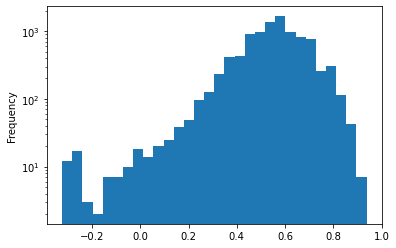

In [393]:
df_merged_motifs.match_score.plot.hist(logy=True, bins=30)

<AxesSubplot:ylabel='Frequency'>

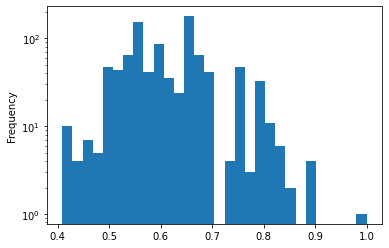

In [394]:
df_motifs.motif.apply(get_best_motif).match_score.plot.hist(logy=True, bins=30)

In [348]:
df_merged_motifs.sort_values(by="match_score", ascending=False)[:100]

,score,jaspar_motif,motif
2604,0.937500,GCGCCGCC,GYCGCCGCC
1102,0.937500,GCGCCGCC,GCMGCCGCC
657,0.937500,GCGCCGCC,GCYGCCGCC
1014,0.937500,GCGCCGCC,GCTGCCGCC
1688,0.937500,GCGCCGCC,GCCGCCGCC
...,...,...,...
962,0.830000,CNCCGCCGCC,CNCCGCCGCCD
1048,0.830000,CNCCGCCGCC,CSCCGCCGCCD
501,0.818182,CCGCCGCCRCC,YCGCCGCCDCC
713,0.818182,CCGCCGCCRCC,MCGCCGCCDCC


In [365]:
df_merged_motifs.sort_values(by="score", ascending=False)[-100:]

,score,jaspar_motif,motif
8999,0.075000,GCCACGTCAGCA,GNNNNNGCAKGCANNNNNS
8047,0.075000,CGGGGGACAYGTCGGG,MNNNNGCAGCAGNNNNNG
5847,0.069231,TGCCACGTCAGCA,TNNNNNNGCATGCANNNNNA
8254,0.069231,GTGCCACGTCATC,KNNNNNNGCAGCANNNNC
8267,0.066667,TAACTATGGTTA,KNNNNAGCTAGCTNNNNM
...,...,...,...
8731,-0.300000,WGTGGGCCCCMCNTNNNNNNNNNNNNNNNY,NNNNNNNNNNNNNNNNNNNNNNNS
3145,-0.300000,WGTGGGCCCCMCNTNNNNNNNNNNNNNNNY,HNNNNNNNNNNNNNNNNNNNNNNS
5722,-0.306667,WGTGGGCCCCMCNTNNNNNNNNNNNNNNNY,SNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
6333,-0.310000,WGTGGGCCCCMCNTNNNNNNNNNNNNNNNY,CNNNNNNNNNNNNNNNNNNNNNNNNNNNG


In [395]:
df_motifs.motif.apply(get_best_motif).sort_values(by="match_score", ascending=False)[:100]

,match_score,jaspar_motif,motif
898,1.00,CTGCATGC,CTGCATGC
867,0.90,CTGCATGC,YTGCATGC
913,0.90,CTGCATGC,CTGCATGY
639,0.90,CTGCATGC,CWGCATGC
56,0.90,GCGCCGCC,SCGCCGCC
...,...,...,...
588,0.75,CTGCATGC,CVTGCATG
889,0.75,CTGCATGC,CTGCAGCT
772,0.75,GCAGACAT,GCADGCAT
887,0.75,CTGCATGC,CTGCAGCW


## Lookup motif

In [4]:
from pathlib import Path

def get_motif_name(motif):
    for location in Path("jaspar").iterdir():
        with open(str(location)) as fh:
            for m in motifs.parse(fh, "jaspar"):
                if m.degenerate_consensus == motif:
                    print(location)

In [15]:
get_motif_name("GCGCCGCC")

jaspar/MA1052.1.jaspar
jaspar/MA1051.1.jaspar
jaspar/MA1053.1.jaspar


- [Jaspar entry](http://jaspar.genereg.net/matrix/MA0975.1/)
- CRF2 (term in [STRING](https://string-db.org/network/3702.AT4G23750.1))
- class: AP2/ERF domain
- stress response
- [chr1A:174,364-174,422](https://bioinformatics.psb.ugent.be/plaza/versions/plaza_v4_5_monocots/igv/show_region/tae)
- 44 motifs